<a href="https://colab.research.google.com/github/elayni/datavis/blob/main/limpeza_ultra_rapida_licitacao_tce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objetivo:** limpar os dados de licitação do TCE-PB apenas o suficiente para plotar gráficos no Observable, eliminando colunas que não serão utilizadas e corrigindo algumas palavras.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# set pastel color for plots
sns.set(style="ticks", palette="BuPu")

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CDIA/DataVis/Exerc1/TCE-PB-Portal-Gestor-Licitacoes_Propostas.txt', sep = "|", encoding = 'iso-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.head()

,protocolo_licitacao,numero_licitacao,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_tipo_administracao_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,situacao_fracassada_licitacao,nome_proponente,cpf_cnpj_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao,nome_setor_atual_licitacao,url
0,Doc. 00625/14,00001/2014,PregÃ£o Presencial,NaN,50001,897,Tribunal de JustiÃ§a,Poder / ÃrgÃ£o Independente,Direta,Estadual,LocaÃ§Ã£o de equipamentos para o sistema de vi...,81600.0,75600.0,14/02/2014,2014.0,NÃ£o,APEL - AplicaÃ§Ãµes EletrÃ´nicas Industria e C...,08991515000102,78000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consulta...
1,Doc. 00707/14,00001/2014,PregÃ£o Presencial,Desterro,201073,658,Prefeitura Municipal de Desterro,Prefeitura,Direta,Municipal,AquisiÃ§Ã£o de 04 (quatro) Carretas Basculante...,60000.0,54000.0,20/01/2014,2014.0,NÃ£o,Veneza Maquinas Comercio Ltda,06824439000204,54000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consulta...
2,Doc. 00714/14,00001/2014,PregÃ£o Presencial,Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,ContrataÃ§Ã£o de empresa para aquisiÃ§Ã£o de c...,500000.0,596300.0,24/01/2014,2014.0,NÃ£o,COMERCIAL DE COMBUSTIVEIS NORDESTE,09382946000134,137400.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consulta...
3,Doc. 00714/14,00001/2014,PregÃ£o Presencial,Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,ContrataÃ§Ã£o de empresa para aquisiÃ§Ã£o de c...,500000.0,596300.0,24/01/2014,2014.0,NÃ£o,CESAR POSTO,00188092000185,351900.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consulta...
4,Doc. 00714/14,00001/2014,PregÃ£o Presencial,Juru,201100,686,Prefeitura Municipal de Juru,Prefeitura,Direta,Municipal,ContrataÃ§Ã£o de empresa para aquisiÃ§Ã£o de c...,500000.0,596300.0,24/01/2014,2014.0,NÃ£o,RI COMERCIO DE DERIVADOS DE PETROLEO,03562340000102,104000.0,Vencedora,Formalizado,ACERVO DIGITAL,https://tramita.tce.pb.gov.br/tramita/consulta...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309270 entries, 0 to 309269
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   protocolo_licitacao                     309270 non-null  object 
 1   numero_licitacao                        309270 non-null  object 
 2   nome_modalidade_licitacao               309270 non-null  object 
 3   nome_municipio                          269312 non-null  object 
 4   cd_ugestora                             309270 non-null  int64  
 5   jurisdicionado_id                       309270 non-null  int64  
 6   nome_jurisdicionado                     309270 non-null  object 
 7   nome_tipo_jurisdicionado                309270 non-null  object 
 8   nome_tipo_administracao_jurisdicionado  309270 non-null  object 
 9   nome_esfera_jurisdicionado              309270 non-null  object 
 10  objeto_licitacao                        3092

In [6]:
df = df.drop(["protocolo_licitacao", "numero_licitacao",	"nome_tipo_administracao_jurisdicionado", "cpf_cnpj_proponente", "nome_setor_atual_licitacao", "url"], axis = 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309270 entries, 0 to 309269
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   nome_modalidade_licitacao          309270 non-null  object 
 1   nome_municipio                     269312 non-null  object 
 2   cd_ugestora                        309270 non-null  int64  
 3   jurisdicionado_id                  309270 non-null  int64  
 4   nome_jurisdicionado                309270 non-null  object 
 5   nome_tipo_jurisdicionado           309270 non-null  object 
 6   nome_esfera_jurisdicionado         309270 non-null  object 
 7   objeto_licitacao                   309270 non-null  object 
 8   valor_estimado_licitacao           268051 non-null  float64
 9   valor_licitado_licitacao           309262 non-null  float64
 10  data_homologacao_licitacao         309250 non-null  object 
 11  ano_homologacao_licitacao          3092

In [8]:
df["situacao_fracassada_licitacao"] = df["situacao_fracassada_licitacao"].replace({"NÃ£o":"0"})

In [9]:
df["situacao_fracassada_licitacao"] = df["situacao_fracassada_licitacao"].replace({"Sim":"1"})

In [10]:
df["nome_municipio"] = df["nome_municipio"].replace({"BelÃ©m":"Belém"})

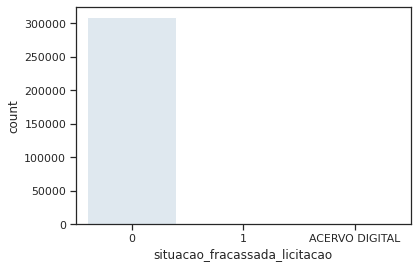

In [11]:
sns.countplot(x="situacao_fracassada_licitacao", data=df)

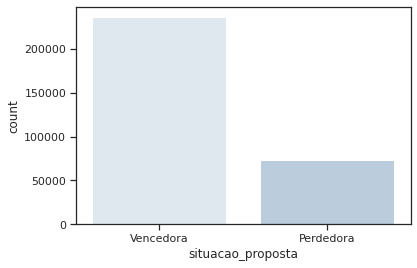

In [12]:
sns.countplot(x="situacao_proposta", data=df)

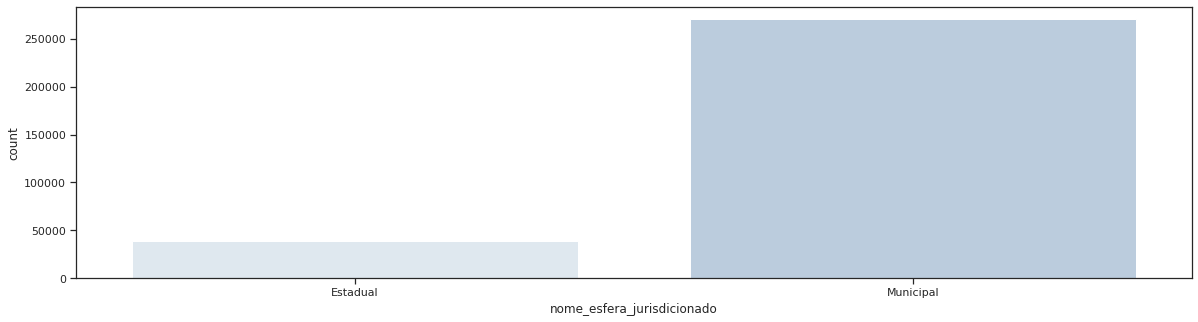

In [13]:
plt.pyplot.figure(figsize=(20,5))
sns.countplot(x="nome_esfera_jurisdicionado", data=df)

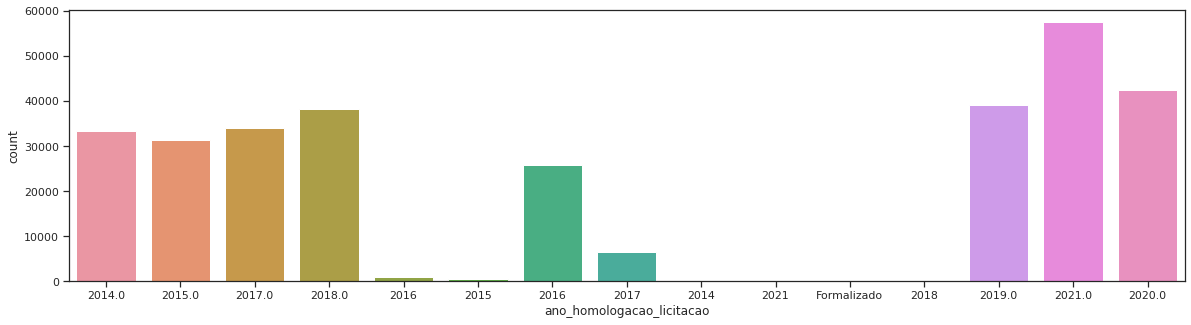

In [14]:
plt.pyplot.figure(figsize=(20,5))
sns.countplot(x="ano_homologacao_licitacao", data=df)

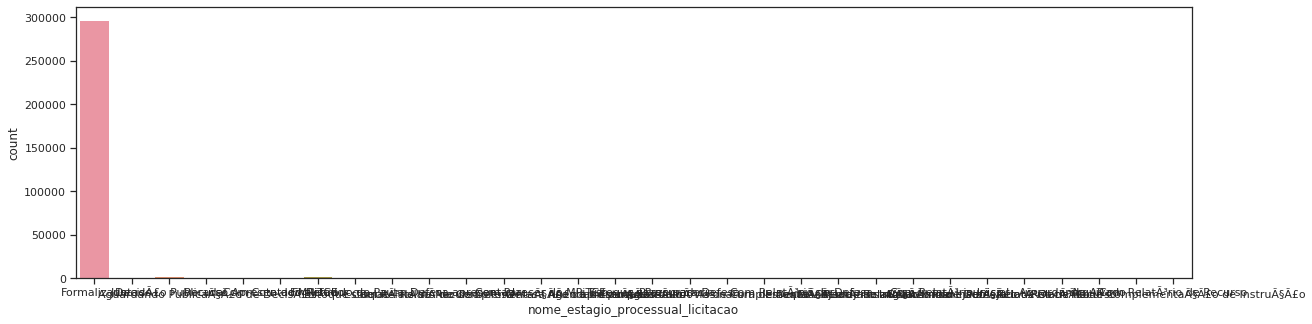

In [15]:
plt.pyplot.figure(figsize=(20,5))
sns.countplot(x="nome_estagio_processual_licitacao", data=df)

In [16]:
df_estagio_process = df["nome_estagio_processual_licitacao"]

In [17]:
df["nome_estagio_processual_licitacao"] = df["nome_estagio_processual_licitacao"].replace({"Agendado para SessÃ£o":"agendado para sessao"})

In [18]:
df["nome_estagio_processual_licitacao"] = df["nome_estagio_processual_licitacao"].replace({"Aguardando Assinatura de DecisÃ£o":"aguardando assinatura de decisao"})

In [19]:
df["nome_estagio_processual_licitacao"] = df["nome_estagio_processual_licitacao"].replace({"Aguardando InserÃ§Ã£o de DecisÃ£o":"aguardando insercao de decisao"})

In [20]:
df["nome_estagio_processual_licitacao"] = df["nome_estagio_processual_licitacao"].replace({"Aguardando PublicaÃ§Ã£o de DecisÃ£o":"aguardando publicacao de decisao"})

In [21]:
df_estagio_process.sort_values(ascending=True)

86719                        Aguardando AR
96874                            Arquivado
295775                  Com Cota do MPjTCE
14387                   Com Cota do MPjTCE
25035                   Com Cota do MPjTCE
                        ...               
5915      aguardando publicacao de decisao
5916      aguardando publicacao de decisao
5797      aguardando publicacao de decisao
2790      aguardando publicacao de decisao
89480                                  NaN
Name: nome_estagio_processual_licitacao, Length: 309270, dtype: object

In [22]:
df = df.dropna()

In [23]:
df.isna().sum()

nome_modalidade_licitacao            0
nome_municipio                       0
cd_ugestora                          0
jurisdicionado_id                    0
nome_jurisdicionado                  0
nome_tipo_jurisdicionado             0
nome_esfera_jurisdicionado           0
objeto_licitacao                     0
valor_estimado_licitacao             0
valor_licitado_licitacao             0
data_homologacao_licitacao           0
ano_homologacao_licitacao            0
situacao_fracassada_licitacao        0
nome_proponente                      0
valor_proposta                       0
situacao_proposta                    0
nome_estagio_processual_licitacao    0
dtype: int64

In [24]:
df["ano_homologacao_licitacao"] = df["ano_homologacao_licitacao"].astype('int64')

In [25]:
df = df.drop(["situacao_fracassada_licitacao"], axis = 1)

In [26]:
df.tail(500)

,nome_modalidade_licitacao,nome_municipio,cd_ugestora,jurisdicionado_id,nome_jurisdicionado,nome_tipo_jurisdicionado,nome_esfera_jurisdicionado,objeto_licitacao,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,nome_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao
306898,PregÃ£o EletrÃ´nico,Belém,601026,11843,Fundo Municipal de SaÃºde de BelÃ©m,Fundo,Municipal,AQUISIÃÃO DE PATRULHA AGRÃCOLA PARA O MUNIC...,274666.67,235890.00,01/12/2021,2021,Agro Shop Comercio Varejista de Medicamentos E...,60000.00,Vencedora,Formalizado
306899,PregÃ£o EletrÃ´nico,Belém,601026,11843,Fundo Municipal de SaÃºde de BelÃ©m,Fundo,Municipal,AQUISIÃÃO DE PATRULHA AGRÃCOLA PARA O MUNIC...,274666.67,235890.00,01/12/2021,2021,FORNECEDORA AGRICOLA COMERCIO E SERVICOS LTDA,274000.00,Vencedora,Formalizado
306907,PregÃ£o Presencial,Bananeiras,101020,39,CÃ¢mara Municipal de Bananeiras,CÃ¢mara Municipal,Municipal,"AQUISIÃÃO, INSTALAÃÃO E CONFIGURAÃÃO DE ...",85000.00,78745.00,30/11/2021,2021,Total Comercio Varejista de Equipamentos de So...,78745.00,Vencedora,Formalizado
306908,PregÃ£o Presencial,Mataraca,601116,15503,Fundo Municipal de SaÃºde de Mataraca,Fundo,Municipal,SeleÃ§Ã£o e ContrataÃ§Ã£o de pessoas jurÃ­dica...,88500.00,88500.00,18/11/2021,2021,LUCINETE LUCENA DE ALMEIDA,30500.00,Vencedora,Formalizado
306909,PregÃ£o Presencial,Mataraca,601116,15503,Fundo Municipal de SaÃºde de Mataraca,Fundo,Municipal,SeleÃ§Ã£o e ContrataÃ§Ã£o de pessoas jurÃ­dica...,88500.00,88500.00,18/11/2021,2021,MARIA DA PENHA SILVA DE AZEVEDO,58000.00,Vencedora,Formalizado
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309255,PregÃ£o EletrÃ´nico,Diamante,201074,660,Prefeitura Municipal de Diamante,Prefeitura,Municipal,AquisiÃ§Ã£o de material mÃ©dico hospitalar par...,288959.54,82365.18,27/09/2021,2021,ALEXANDRE R BARBOSA DA SILVA,7289.65,Vencedora,Formalizado
309256,PregÃ£o EletrÃ´nico,Diamante,201074,660,Prefeitura Municipal de Diamante,Prefeitura,Municipal,AquisiÃ§Ã£o de material mÃ©dico hospitalar par...,288959.54,82365.18,27/09/2021,2021,Ulisses E Cordeiro de Santana,8840.45,Vencedora,Formalizado
309257,PregÃ£o EletrÃ´nico,Diamante,201074,660,Prefeitura Municipal de Diamante,Prefeitura,Municipal,AquisiÃ§Ã£o de material mÃ©dico hospitalar par...,288959.54,82365.18,27/09/2021,2021,ALMED ALDENIO DISTRIBUIDORA DE MEDICAMENTOS E ...,13449.75,Vencedora,Formalizado
309258,PregÃ£o EletrÃ´nico,Diamante,201074,660,Prefeitura Municipal de Diamante,Prefeitura,Municipal,AquisiÃ§Ã£o de material mÃ©dico hospitalar par...,288959.54,82365.18,27/09/2021,2021,TECNOCENTER MATERIAIS MÃDICOS E HOSPITALARES ...,1100.00,Vencedora,Formalizado


In [27]:
df = df.drop(['nome_modalidade_licitacao', 'cd_ugestora',	'jurisdicionado_id', 'nome_jurisdicionado', 'objeto_licitacao'], axis = 1)

In [28]:
df.head()

,nome_municipio,nome_tipo_jurisdicionado,nome_esfera_jurisdicionado,valor_estimado_licitacao,valor_licitado_licitacao,data_homologacao_licitacao,ano_homologacao_licitacao,nome_proponente,valor_proposta,situacao_proposta,nome_estagio_processual_licitacao
1,Desterro,Prefeitura,Municipal,60000.0,54000.0,20/01/2014,2014,Veneza Maquinas Comercio Ltda,54000.0,Vencedora,Formalizado
2,Juru,Prefeitura,Municipal,500000.0,596300.0,24/01/2014,2014,COMERCIAL DE COMBUSTIVEIS NORDESTE,137400.0,Vencedora,Formalizado
3,Juru,Prefeitura,Municipal,500000.0,596300.0,24/01/2014,2014,CESAR POSTO,351900.0,Vencedora,Formalizado
4,Juru,Prefeitura,Municipal,500000.0,596300.0,24/01/2014,2014,RI COMERCIO DE DERIVADOS DE PETROLEO,104000.0,Vencedora,Formalizado
5,MarizÃ³polis,Prefeitura,Municipal,620000.0,567952.5,03/02/2014,2014,MARIA DE FÃTIMA CARTAXO ANDRADE & CIA LTDA,567952.5,Vencedora,Formalizado


In [30]:
df.to_csv("/content/drive/MyDrive/CDIA/DataVis/tce_licitacoes.csv")